<a href="https://colab.research.google.com/github/MohanaR01/Data-science/blob/main/Decision_Tree_POC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [3]:
df = pd.read_csv('IRIS.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
5.4           3.4          1.7           0.2          Iris-setosa        1
5.5           2.5          4.0           1.3          Iris-versicolor    1
              2.4          3.8           1.1          Iris-versicolor    1
                                                                        ..
6.3           2.5          4.9           1.5          Iris-versicolor    1
              2.3          4.4           1.3          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
              2.9          4.3           1.3          Iris-versicolor    1
4.3           3.0          1.1           0.1          Iris-setosa        1
Length: 147, dtype: int64

In [ ]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.duplicated().value_counts()


False    147
True       3
dtype: int64

In [ ]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [5]:
DF = df.drop_duplicates()

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
DF.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
x = DF.iloc[:,:-1]
y = DF.iloc[:,-1]

In [ ]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=111)

In [9]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

In [10]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [11]:
from sklearn import tree

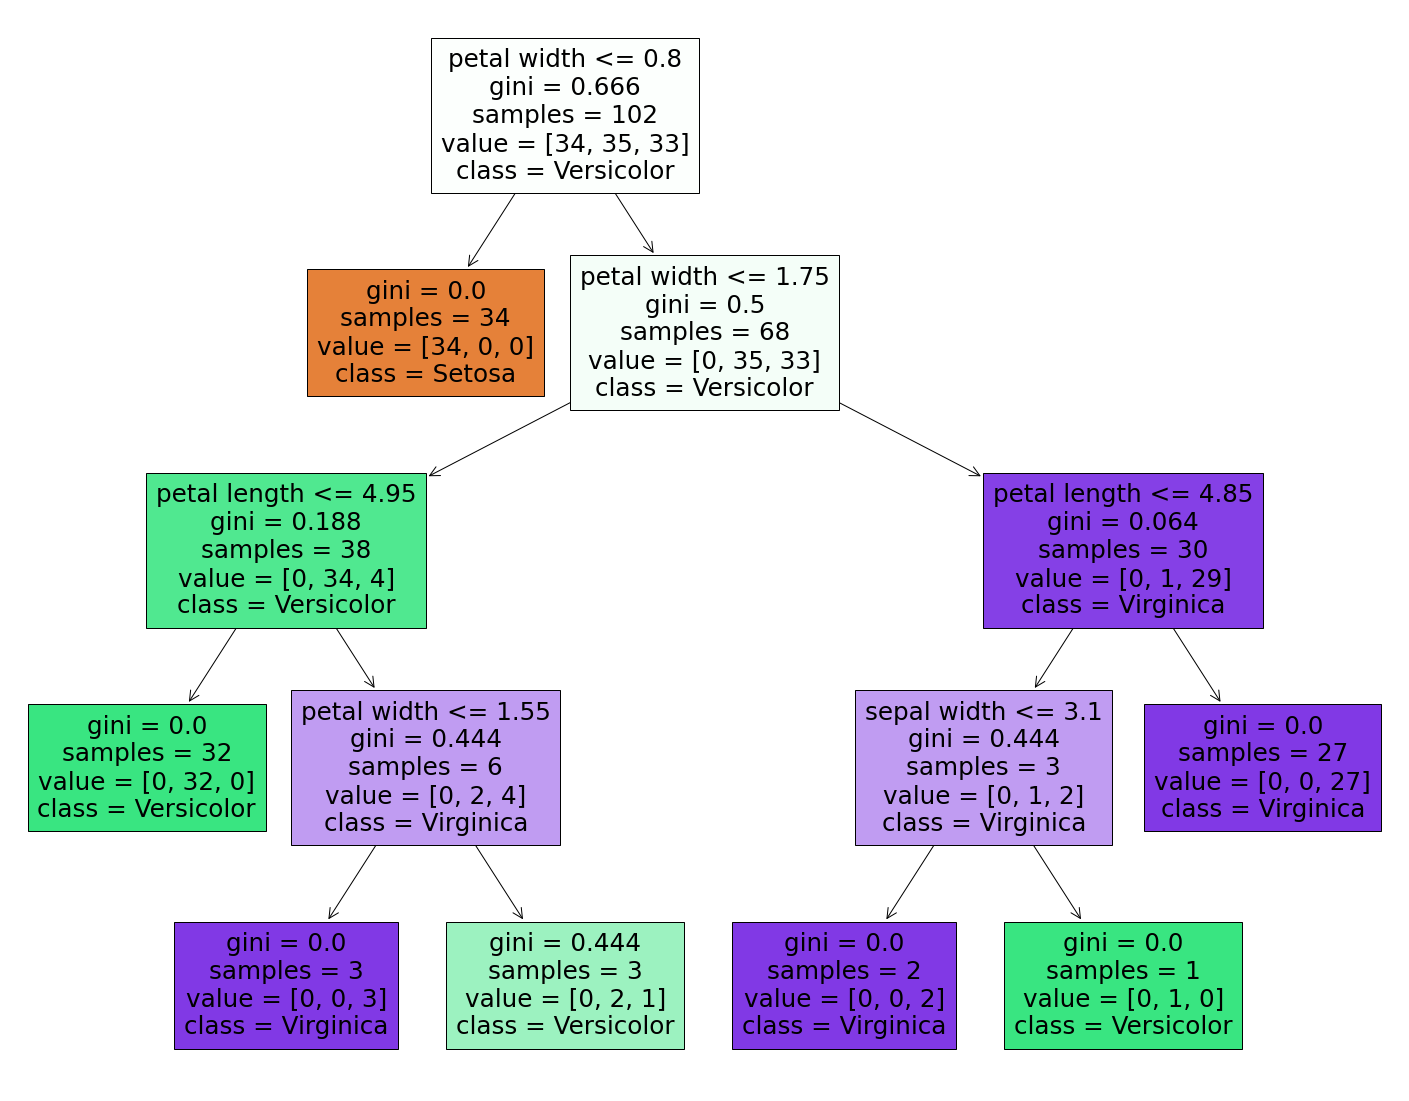

In [21]:
fig = plt.figure(figsize=(25,20))
DT_img = tree.plot_tree(DT,feature_names=['sepal length','sepal width','petal length','petal width'],class_names=['Setosa','Versicolor','Virginica'],filled=True)

In [13]:
fig.savefig('Decision_Tree.png')

In [14]:
y_predict = DT.predict(x_test)

In [15]:
#Evaluation metrics
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score,f1_score
cm = confusion_matrix(y_test,y_predict)
print('Confusion',cm)

accuracy = accuracy_score(y_test,y_predict)
print('Accuracy',accuracy)


Confusion [[14  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Accuracy 0.9777777777777777


In [20]:
precision = np.diag(cm)/np.sum(cm,axis=1)
recall = np.diag(cm)/np.sum(cm,axis=0)
P = np.mean(precision)
R = np.mean(recall)
print("Precision =",P)
print("Recall=",R)

Precision = 0.9791666666666666
Recall= 0.9791666666666666
